In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = '/titanic_data.csv'

In [4]:
train_df = pd.read_csv(file_path, sep =",")


In [5]:
print(train_df)

     pclass  survived                                     name     sex    age  \
0         2         1        Mellinger, Miss. Madeleine Violet  female  13.00   
1         2         1                        Wells, Miss. Joan  female   4.00   
2         2         1           Duran y More, Miss. Florentina  female  30.00   
3         3         0                       Scanlan, Mr. James    male    NaN   
4         3         1             Bradley, Miss. Bridget Delia  female  22.00   
..      ...       ...                                      ...     ...    ...   
911       3         1  Dean, Miss. Elizabeth Gladys "Millvina"  female   0.17   
912       3         0                        Guest, Mr. Robert    male    NaN   
913       3         1                       Smyth, Miss. Julia  female    NaN   
914       2         1                     Sincock, Miss. Maude  female  20.00   
915       3         0            Bourke, Mrs. John (Catherine)  female  32.00   

     sibsp  parch         t

In [6]:
train_df.isnull().sum()


pclass         0
survived       0
name           0
sex            0
age          175
sibsp          0
parch          0
ticket         0
fare           0
cabin        702
embarked       2
body         831
home.dest    389
dtype: int64

In [11]:
train_df=train_df.drop(['cabin','body','home.dest'],axis=1)
mean=train_df['age'].mean()
num=0

train_df

KeyError: ignored

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/titanic_data.csv'

train_df = pd.read_csv(file_path, sep=',')

train_df

#데이터 정제 위해 결측 값 측정하자

train_df.isnull().sum()

train_df=train_df.drop(['cabin','body','home.dest'],axis=1)
train_df

mean=train_df['age'].mean()
num=0


mean

for i in train_df['age']:
  if np.isnan(i):
    train_df['age'][num]=mean
    num+=1
train_df['age']

<ipython-input-13-41fd2132c138>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['age'][num]=mean


0      30.231444
1      30.231444
2      30.231444
3      30.231444
4      30.231444
         ...    
911     0.170000
912          NaN
913          NaN
914    20.000000
915    32.000000
Name: age, Length: 916, dtype: float64

In [ ]:
num=0
for i in train_df['embarked'] :
  if type(i)==float :
    train_df['embarked'][num]='S'
  num+=1
train_df.isnull().sum()

In [14]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.grid'] = True

def bar_chart(feature):
    survived = train_df[train_df['survived']==1][feature].value_counts()
    dead = train_df[train_df['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar',stacked=True)

In [15]:
train_df.loc[train_df['age']<=20, 'age']=0
train_df.loc[(train_df['age']<=40)&(train_df['age']>20), 'age']=1
train_df.loc[(train_df['age']<=60)&(train_df['age']>40), 'age']=2
train_df.loc[(train_df['age']<=80)&(train_df['age']>60), 'age']=3
train_df.loc[train_df['age']>80, 'age']=4

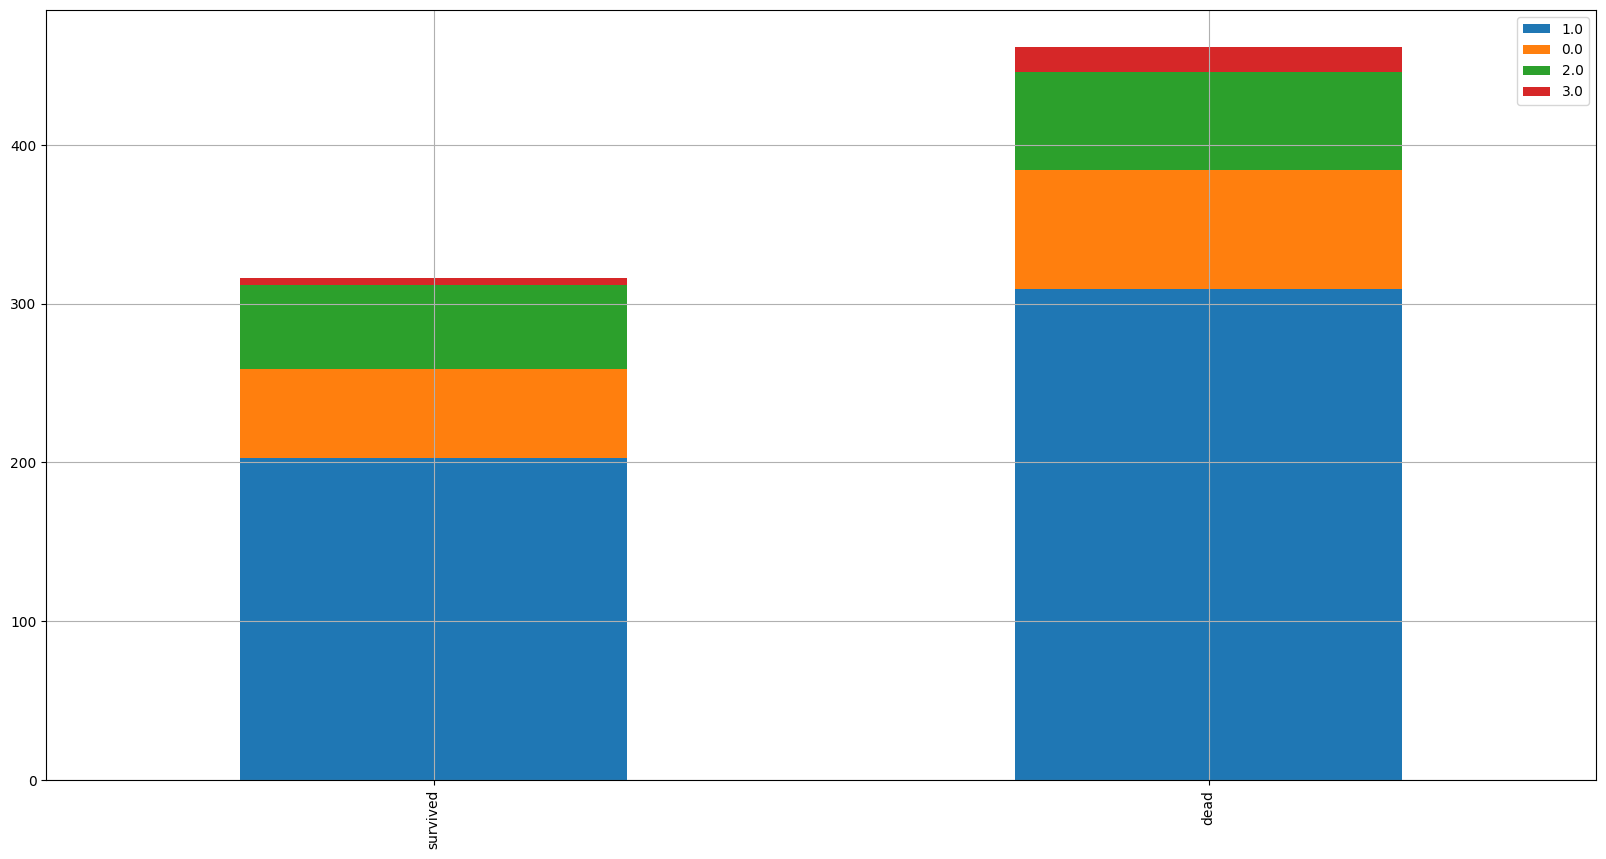

In [16]:
bar_chart('age')

In [17]:
train_df.loc[train_df['embarked']=='S','embarked']=1
train_df.loc[train_df['embarked']=='C','embarked']=2
train_df.loc[train_df['embarked']=='Q','embarked']=3

In [18]:
train_df['family']=train_df['sibsp']+train_df['parch']
train_df=train_df.drop(['sibsp','parch'],axis=1)

In [19]:
train_df.corr(method='pearson')

<ipython-input-19-1134743fa90e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr(method='pearson')


,pclass,survived,age,fare,family
pclass,1.000000,-0.309735,-0.324354,-0.581359,0.060302
survived,-0.309735,1.000000,-0.019219,0.241467,-0.016433
age,-0.324354,-0.019219,1.000000,0.148819,-0.198945
fare,-0.581359,0.241467,0.148819,1.000000,0.250437
family,0.060302,-0.016433,-0.198945,0.250437,1.000000


<ipython-input-20-354332df1ad2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(train_df.corr(),
<ipython-input-20-354332df1ad2>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(train_df.corr(),


<Axes: >

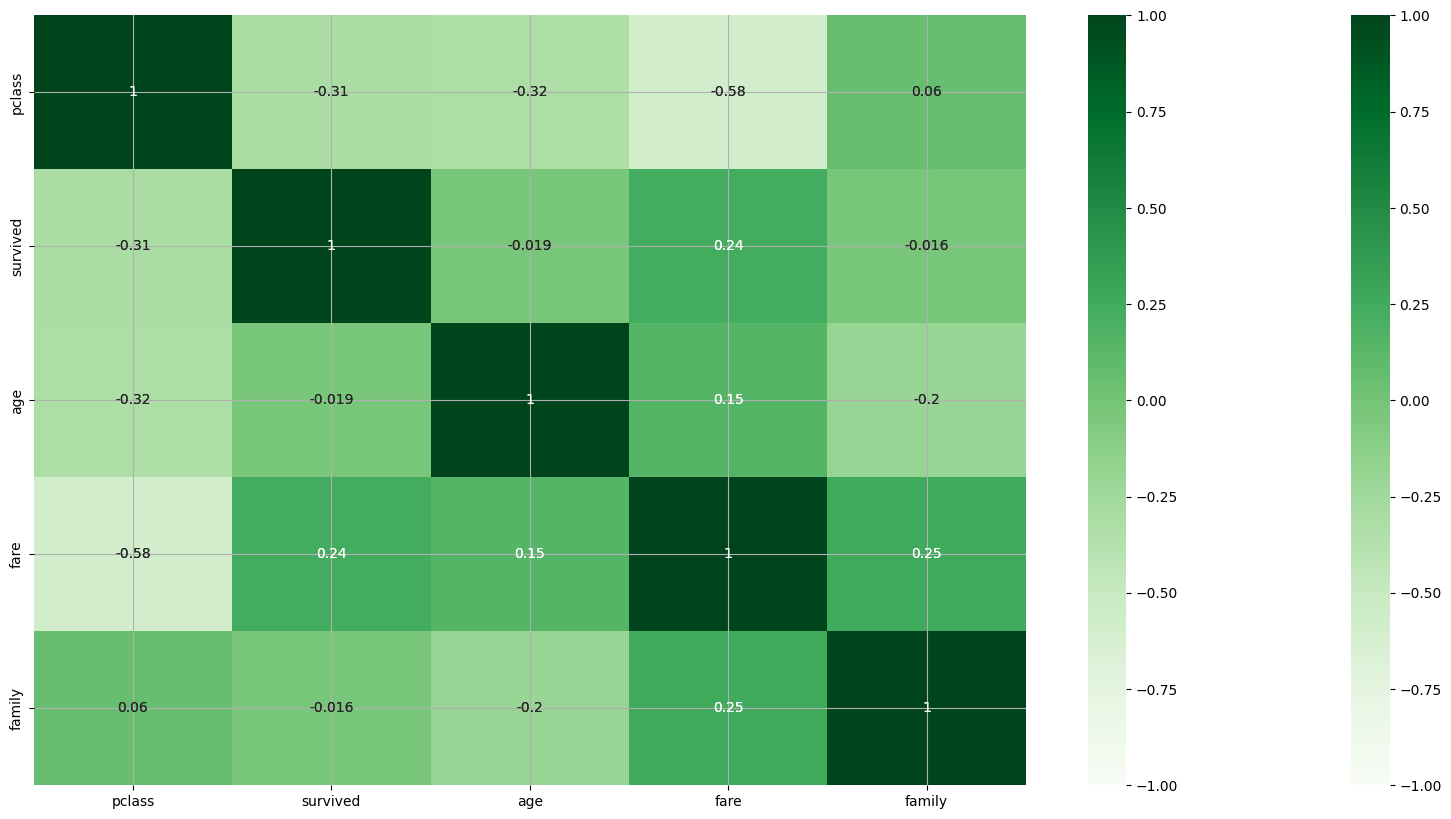

In [20]:
import seaborn as sb

sb.heatmap(train_df.corr(),
           annot = True, #실제값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax = 1,#컬러 차트 영역 -1~+1
         )

plt.rcParams["figure.figsize"] = (5,5)

sb.heatmap(train_df.corr(),
           annot = True, #실제값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax = 1,#컬러 차트 영역 -1~+1
         )